# Importing the Libraries

In [38]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Exploring Data

In [39]:
data = pd.read_csv('https://raw.githubusercontent.com/rachanabv07/Salary-Prediction-using-Manually-and-Library-/main/Salary_dataset.csv')
data.tail()

,Unnamed: 0,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


# Data visualization

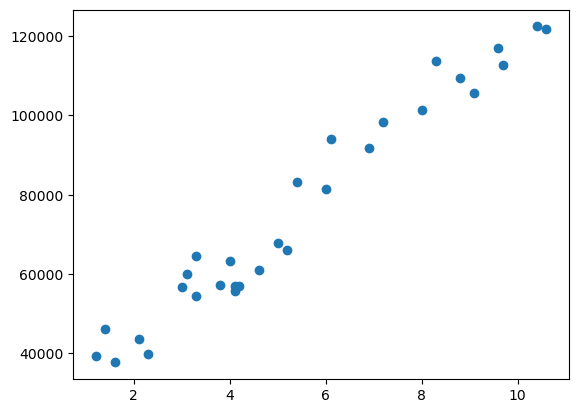

In [40]:
x = data['YearsExperience']
y = data['Salary']

plt.scatter(x,y)

# Data Splitting

In [41]:
X_train, X_test, y_train, y_test =  train_test_split(x, y, random_state=42)

In [42]:
X_train.count()

22

In [43]:
X_test.count()

8

In [44]:
#calculating mean of both x and y 

y_mean = y_train.mean()
print("y_mean =",y_mean)
x_mean = X_train.mean()
print("x_mean =",x_mean)

y_mean = 70417.40909090909
x_mean = 4.895454545454545


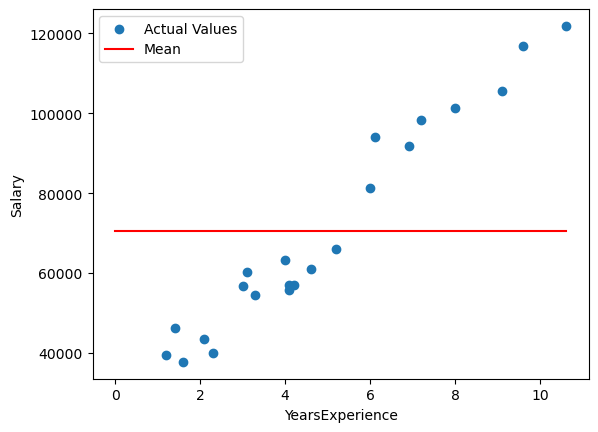

In [45]:
plt.scatter(X_train,y_train, label="Actual Values")
plt.plot([0,10.6],[70417.40909090909,70417.40909090909], color = 'r', label ="Mean")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()

## Manually Calculation slope - m 

In [46]:
m = ((x_mean - X_train)*(y_mean - y_train)).sum()/((x_mean - X_train)**2).sum()
m

9371.016079696603

## Manually Calculation intercept - c

In [47]:
c= y_mean - (m * x_mean)
c

24542.025828030724

## Manual Prediction

In [48]:
y_pred = m*X_test + c
y_pred

27    115440.881801
15     71397.106227
23    102321.459290
17     75145.512658
8      55466.378891
9      60151.886931
28    122000.593057
24    107006.967329
Name: YearsExperience, dtype: float64

## Calculating Root Mean Square Error Manually

In [49]:
err= (y_test - y_pred)**2
RMSE_score_m = ((err.sum())/8)**(1/2)
RMSE_score_m

6229.172416338355

# Calculating R Square Error Manually

In [50]:
RSS = ((y_test - y_pred)**2).sum()
TSS = ((y_test - y_test.mean())**2).sum()
R2_score = 1 - (RSS/TSS)
R2_score 

0.9347210011126783

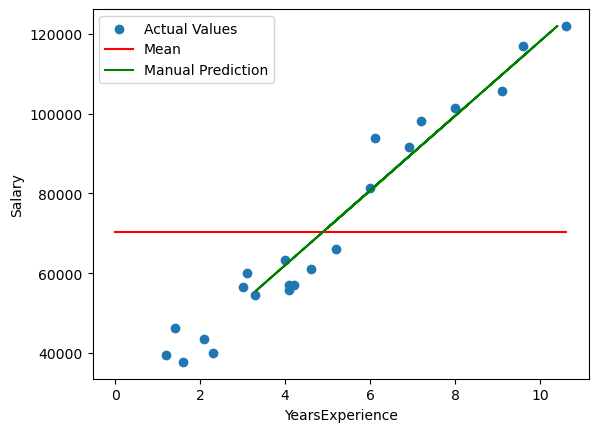

In [51]:
plt.scatter(X_train,y_train, label="Actual Values")
plt.plot([0,10.6],[70417.40909090909,70417.40909090909], color = 'r', label = "Mean")
plt.plot(X_test,y_pred, color = "g", label = "Manual Prediction")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()

# Prediction using sklearn Library

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
Xl = pd.DataFrame(X_train)
Xlt = pd.DataFrame(X_test)
yl = pd.DataFrame(y_train)

In [54]:
model=LinearRegression()

model.fit(Xl,yl)

LinearRegression()

In [55]:
model.coef_

array([[9371.0160797]])

In [56]:
model.intercept_

array([24542.02582803])

In [57]:
y1 = pd.DataFrame(model.predict(Xlt))


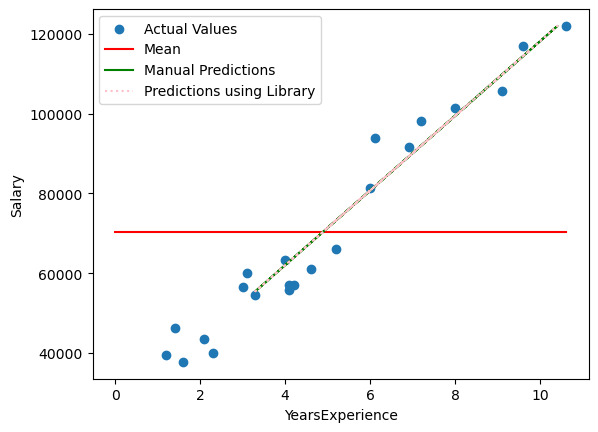

In [58]:
plt.scatter(X_train,y_train, label="Actual Values")
plt.plot([0,10.6],[70417.40909090909,70417.40909090909], color = 'r', label = "Mean")
plt.plot(X_test,y_pred, color = "g", label = "Manual Predictions")
plt.plot(X_test,y1,color='pink', linestyle='dotted', label = "Predictions using Library")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
RMSE_score = mean_squared_error(y_test, y1)

In [61]:
RMSE_score**(1/2)

6229.172416338351

In [62]:
from sklearn.metrics import r2_score
r2_score(y_test, y1)

0.9347210011126783

# Calculating m and c using Gradient_descent()

In [63]:
import numpy as np

def gradient_descent():
    
    learning_rate = 0.01
    num_iter = 100
    ep = 0.000000001
    m = np.random.random()
    c = np.random.random()
    
    for i in range(num_iter):
        
        dE_dm = ((np . sum((((m+ep) * Xl) + c) - yl)) - (np . sum((((m) * Xl) + c) - yl)))/ep
        dE_dc = ((np . sum(((m * Xl) + (c+ep)) - yl)) - (np . sum((((m) * Xl) + c) - yl)))/ep
        
        m = m - learning_rate * dE_dm
        c = c - learning_rate * dE_dc
  
    return (m, c)


result = gradient_descent()
print("m = ", m)
print("c = ", c)

m =  9371.016079696603
c =  24542.025828030724
